<a href="https://colab.research.google.com/github/thatajml/Student-Performance-Prediction/blob/dataset/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (17000, 9)
First 5 Rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
✅ Cleaned dataset saved as 'cleaned_student_scores.csv'


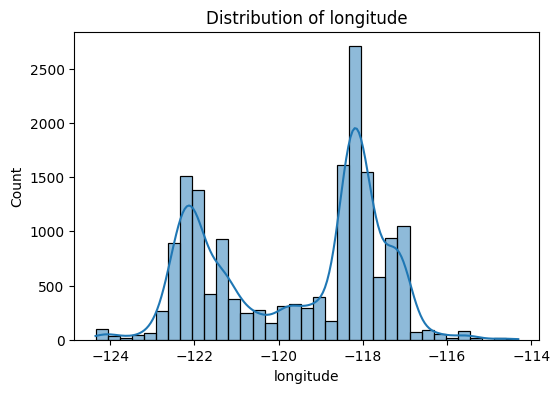

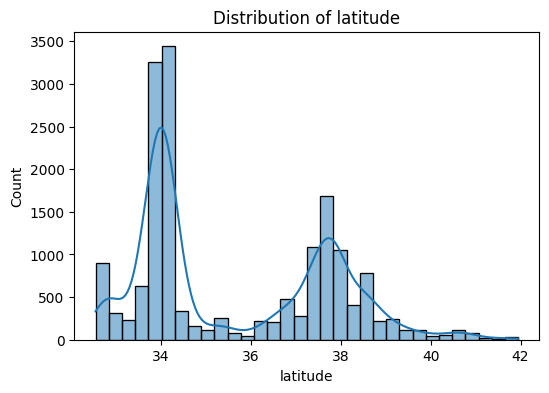

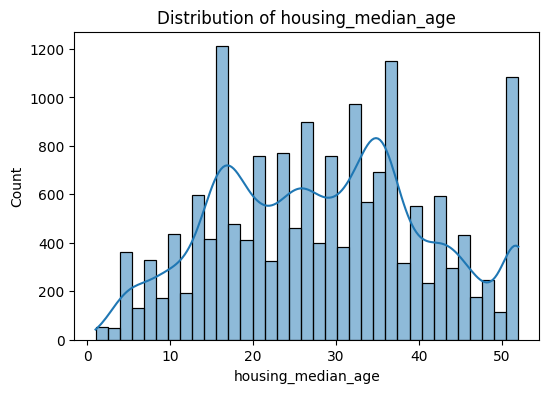

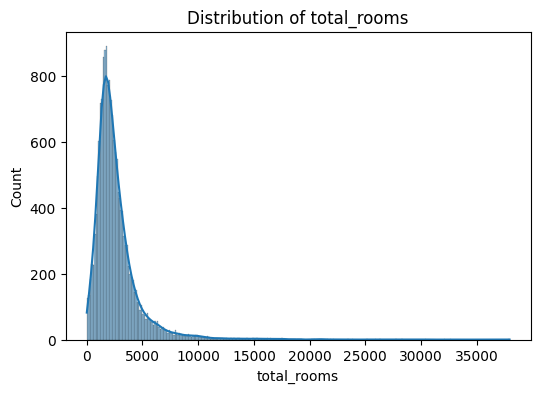

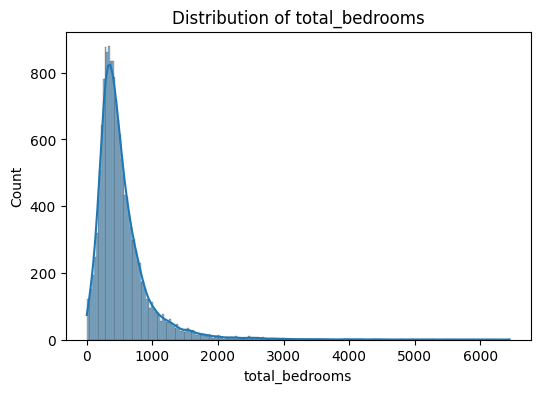

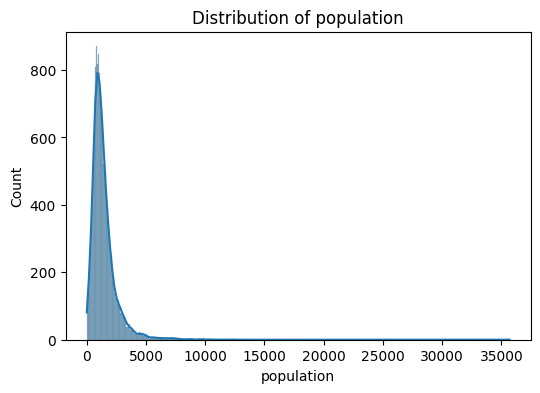

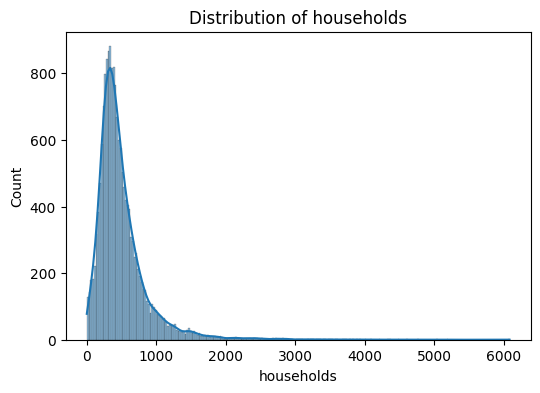

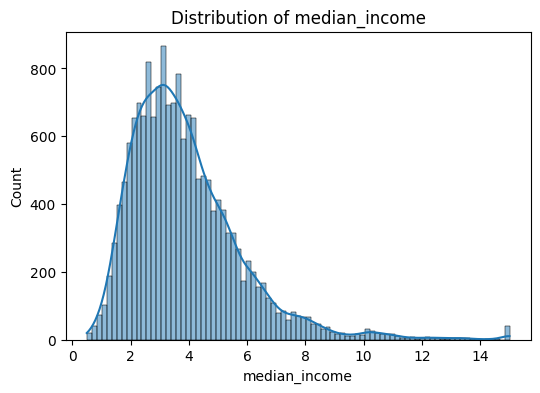

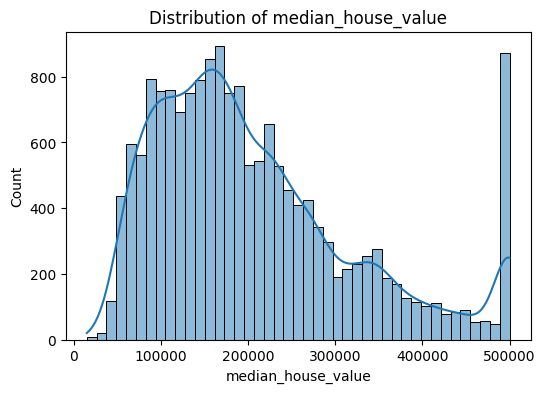

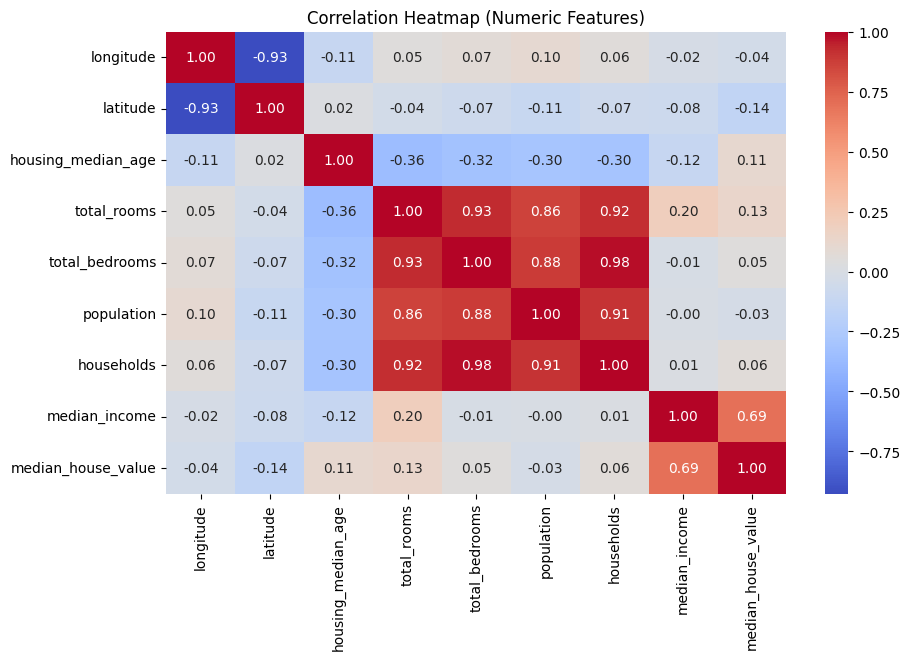

✅ EDA summary saved as 'EDA_Summary.txt'


In [2]:
# =============================
# 1. IMPORT LIBRARIES
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# =============================
# 2. LOAD DATASET
# =============================
# Change filename if needed
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

# Quick check
print("Dataset Shape:", df.shape)
print("First 5 Rows:")
print(df.head())

# =============================
# 3. HANDLE MISSING VALUES
# =============================
# Separate columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Imputation strategies
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# =============================
# 4. ENCODE CATEGORICAL DATA
# =============================
# OneHotEncoder for categorical columns
cat_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# =============================
# 5. NORMALIZE NUMERIC DATA
# =============================
scaler = StandardScaler()

# =============================
# 6. PIPELINE FOR PREPROCESSING
# =============================
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline(steps=[('imputer', num_imputer), ('scaler', scaler)]), num_cols),
    ('cat', Pipeline(steps=[('imputer', cat_imputer), ('encoder', cat_encoder)]), cat_cols)
])

# Apply transformation
df_cleaned = preprocessor.fit_transform(df)

# Get transformed column names
# Need to handle cases where cat_cols is empty
if len(cat_cols) > 0:
    cat_encoded_cols = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(cat_cols)
    all_cols = list(num_cols) + list(cat_encoded_cols)
else:
    all_cols = list(num_cols)


# Create cleaned DataFrame
df_cleaned = pd.DataFrame(df_cleaned, columns=all_cols)

# =============================
# 7. SAVE CLEANED DATASET
# =============================
df_cleaned.to_csv("cleaned_student_scores.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_student_scores.csv'")

# =============================
# 8. GENERATE VISUALIZATIONS
# =============================
# Histograms for numeric data
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Countplots for categorical data
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation heatmap (numeric only)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# =============================
# 9. EDA SUMMARY
# =============================
summary = f"""
EDA Summary:
------------
1. Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
2. Missing values handled:
   - Numeric: Mean imputation
   - Categorical: Mode imputation
3. Categorical data encoded with OneHotEncoding (drop first).
4. Numeric features normalized using StandardScaler.
5. Correlation heatmap generated to identify relationships.
6. Cleaned dataset saved as 'cleaned_student_scores.csv'.

Top correlations with target (if 'Score' exists):
{df[num_cols].corr()['median_house_value'].sort_values(ascending=False) if 'median_house_value' in df[num_cols].columns else 'No target column found'}
"""

with open("EDA_Summary.txt", "w") as f:
    f.write(summary)

print("✅ EDA summary saved as 'EDA_Summary.txt'")